In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [83]:
#datatsets
#https://www.kaggle.com/datasets/arpitjain007/dog-vs-cat-fastai
Dir='F:\\tfff\\TFODCourse\\data\\dogscats\\train'
Cate=["cats","dogs"]

In [3]:
img_size=100
data=[]
for categ in Cate:
    folder=os.path.join(Dir,categ)
    label=Cate.index(categ)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])

In [4]:
len(data)

23000

In [5]:
import random

In [6]:
random.shuffle(data)

In [7]:
data[55]

[array([[[132,  98,  85],
         [ 73,  51,  45],
         [ 46,  38,  39],
         ...,
         [ 36,  32,  38],
         [ 34,  30,  36],
         [ 35,  31,  37]],
 
        [[121,  87,  74],
         [ 74,  52,  47],
         [ 48,  42,  43],
         ...,
         [ 39,  35,  41],
         [ 41,  37,  43],
         [ 39,  35,  41]],
 
        [[116,  83,  74],
         [ 75,  56,  53],
         [ 56,  49,  54],
         ...,
         [ 37,  33,  39],
         [ 37,  33,  39],
         [ 37,  33,  39]],
 
        ...,
 
        [[136, 144, 157],
         [136, 142, 153],
         [141, 146, 155],
         ...,
         [121, 122, 132],
         [126, 127, 137],
         [117, 118, 128]],
 
        [[136, 144, 157],
         [137, 143, 154],
         [140, 145, 154],
         ...,
         [125, 126, 136],
         [120, 121, 131],
         [118, 119, 129]],
 
        [[132, 140, 153],
         [139, 145, 156],
         [140, 145, 154],
         ...,
         [126, 127, 137],
  

In [19]:
train_images=[]
train_labels=[]
for x,y in data:
    train_images.append(x)
    train_labels.append(y)

In [20]:
train_images=np.array(train_images)
train_labels=np.array(train_labels)

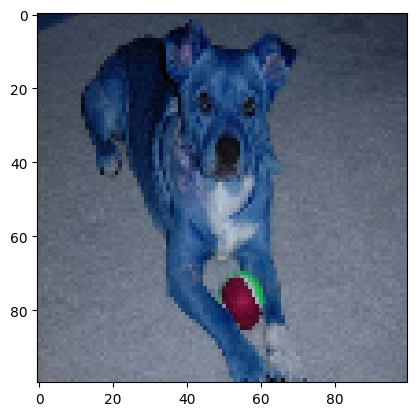

In [21]:
plt.imshow(train_images[7])

In [22]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
719/719 [==============================] - 32s 16ms/step - loss: 0.9146 - accuracy: 0.6225
Epoch 2/10
719/719 [==============================] - 11s 15ms/step - loss: 0.5523 - accuracy: 0.7207
Epoch 3/10
719/719 [==============================] - 11s 16ms/step - loss: 0.4876 - accuracy: 0.7655
Epoch 4/10
719/719 [==============================] - 11s 16ms/step - loss: 0.4317 - accuracy: 0.8039
Epoch 5/10
719/719 [==============================] - 11s 16ms/step - loss: 0.3833 - accuracy: 0.8257
Epoch 6/10
719/719 [==============================] - 11s 15ms/step - loss: 0.3519 - accuracy: 0.8438
Epoch 7/10
719/719 [==============================] - 11s 15ms/step - loss: 0.2913 - accuracy: 0.8758
Epoch 8/10
719/719 [==============================] - 11s 15ms/step - loss: 0.2470 - accuracy: 0.8967
Epoch 9/10
719/719 [==============================] - 11s 16ms/step - loss: 0.2009 - accuracy: 0.9188
Epoch 10/10
719/719 [==============================] - 11s 15ms/step - loss: 0.160

In [27]:
testDir='F:\\tfff\\TFODCourse\\data\\dogscats\\valid'
img_size=100
testdata=[]
for categ in Cate:
    folder=os.path.join(testDir,categ)
    label=Cate.index(categ)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        testdata.append([img_arr,label])

In [28]:
len(testdata)

2000

In [29]:
test_images=[]
test_labels=[]
for x,y in testdata:
    test_images.append(x)
    test_labels.append(y)

In [53]:
test_images=np.array(test_images)
test_labels=np.array(test_labels)

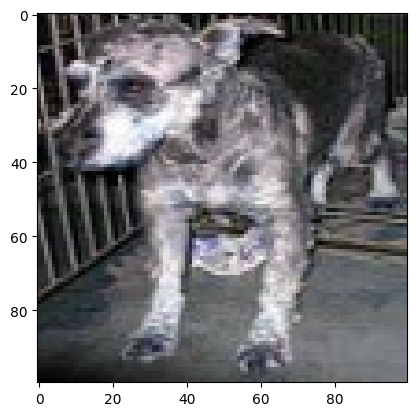

In [31]:
plt.imshow(test_images[1000])

Pick a number: 88
1/1 [==============================] - 0s 493ms/step
Predicated cats
Real cats


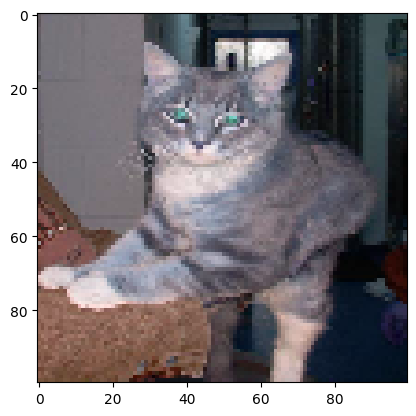

In [32]:
num = int(input("Pick a number: "))
prediction = model.predict(np.array([test_images[num]]))
predicted_class = Cate[np.argmax(prediction)]
print("Predicated "+predicted_class)
print("Real "+Cate[int(test_labels[num])])
plt.imshow(test_images[num])

Pick a number: 1012
1/1 [==============================] - 0s 17ms/step
Predicated dogs
Real dogs


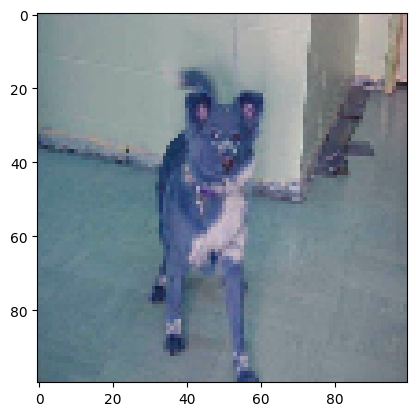

In [33]:
num = int(input("Pick a number: "))
prediction = model.predict(np.array([test_images[num]]))
predicted_class = Cate[np.argmax(prediction)]
print("Predicated "+predicted_class)
print("Real "+Cate[int(test_labels[num])])
plt.imshow(test_images[num])

In [52]:
prediction=[]
for img in test_images:
    p = model.predict(np.array([img]))
    prediction.append(p)

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


In [54]:
len(prediction)

2000

In [55]:
predicted_class = []
for pp in prediction:
    c=[np.argmax(pp)]
    predicted_class.append(c)

In [56]:
len(predicted_class )

2000

In [57]:
fail=[]
for i in range(2000):
    if predicted_class[i]!=test_labels[i]:
                       fail.append(i)

In [58]:
len(fail)

476

In [81]:
accuracy=1-((len(prediction)/len(fail))*100)

In [82]:
accuracy

0.7899159663865546